In [1]:
import warnings
warnings.filterwarnings('ignore')

#
# Importando os dados e imprimindo a 'head'

In [2]:
import pandas as pd

uri= "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados= pd.read_csv(uri)

dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


#
# Traduzindo as features dos dados

In [3]:
mapa= {
    'unfinished' : 'inacabado',
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco'
}

dados.rename(columns= mapa, inplace= True)
dados.head()

,inacabado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


#
# Criando a feature/coluna 'finalizado'
#### A coluna 'inacabado' acaba sendo algo meio embaraçoso, confuso quando estamos lidando com 1's e 0's, sim e nao.

In [4]:
dados['finalizado']= dados['inacabado'].replace({0:1, 1:0})
dados.tail()

,inacabado,horas_esperadas,preco,finalizado
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


#
# Plotando um grafico para visualizacao das features
#### Como temos apenas duas features nesse conjunto de dados (horas_esperadas & preco), podemos desenhar/plotar essas informacoes. Podemos plotar utilizando uma feature em um eixo e outra feature em outro eixo, ja que nao utilizaremos a feature 'inacabado'.

In [5]:
import seaborn as sns

### Grafico de dispersao (scatterplot)

<Axes: xlabel='horas_esperadas', ylabel='preco'>

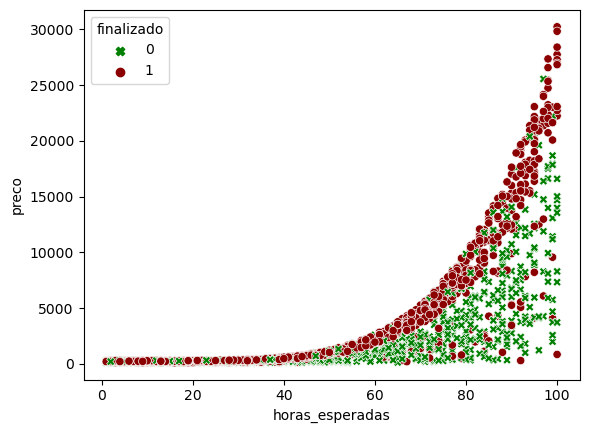

In [6]:
sns.scatterplot(data= dados, x= 'horas_esperadas', y= 'preco', hue= 'finalizado', palette= {'darkred','green'},
                style= 'finalizado', markers= {0:'X',1:'o'})

### Grafico relacao (relplot)

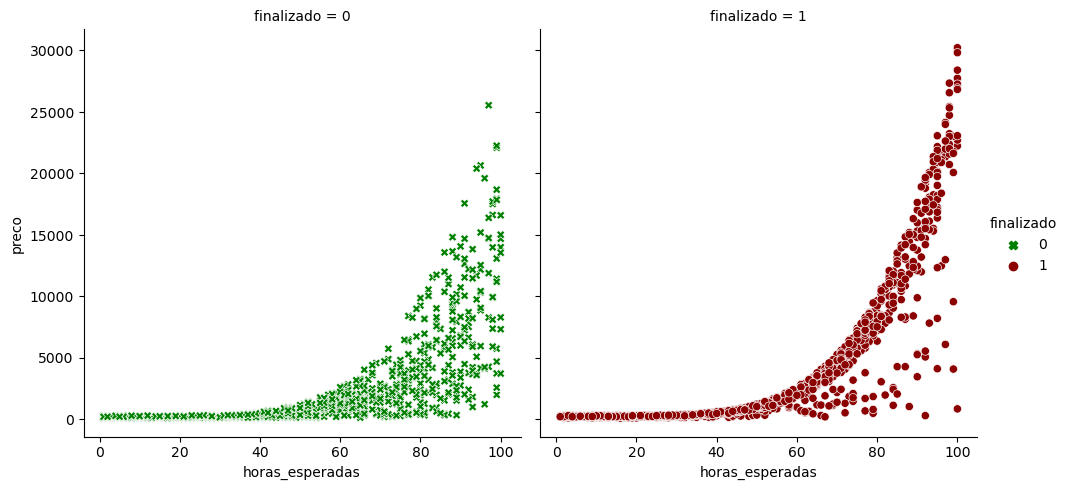

In [7]:
sns.relplot(data= dados, x= 'horas_esperadas', y= 'preco', hue= 'finalizado', palette= {'darkred','green'},
           style= 'finalizado', markers= {0:'X',1:'o'}, col= 'finalizado')

#
# Com tudo pronto, vamos comecar a modelar

### Separando x e y, importando as bibliotecas e criando as variaveis de treino e teste

In [8]:
x= dados[['horas_esperadas', 'preco']]
y= dados['finalizado']

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score


SEED= 5
np.random.seed(SEED)
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, stratify= y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(x_train), len(x_test)))

Treinaremos com 1617 elementos e testaremos com 540 elementos


### Criando o modelo, as previsoes e a taxa de acerto

In [9]:
model= LinearSVC()
model.fit(x_train, y_train)

previsoes= model.predict(x_test)
taxa_acerto= accuracy_score(y_test, previsoes)

print("A acurácia foi de %.2f%%" % (taxa_acerto*100))

A acurácia foi de 49.26%


### Fazendo o teste de baseline
#### O algoritmo base é o que chamamos de "algoritmo burro" que apenas chuta os valores da classificação e o resultado desses chutes serve de base para medir se nosso modelo - que chamamos de "algoritmo inteligente" - realmente aprendeu e consegue classificar bem. É o parâmetro que devemos superar quando construímos estimadores. Devemos ser muito melhores que as porcentagens apresentadas na baseline, e por isso é muito importante que ele exista ainda que teste sempre a mesma classe. 
#### Portanto, inventaremos um algoritmo bem simples que terá como previsão que todos os projetos são finalizados, isto é, os 540 elementos de teste serão 1.

In [10]:
import numpy as np
previsoes_de_base= np.ones(540)

taxa_acerto= accuracy_score(y_test, previsoes_de_base)

print("A acurácia do algoritimo de baseline foi %.2f%%" % (taxa_acerto*100))

A acurácia do algoritimo de baseline foi 52.59%


# Analisando cada uma das classificações que realizamos
##### https://cursos.alura.com.br/course/machine-learning-introducao-a-classificacao-com-sklearn/task/46780

In [11]:
x_min = x_test.horas_esperadas.min()
x_max = x_test.horas_esperadas.max()
y_min = x_test.preco.min()
y_max = x_test.preco.max()
print(x_min, x_max,y_min,y_max)

1 100 100 30223


In [12]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/ pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/ pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [13]:
Z = model.predict(pontos)
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

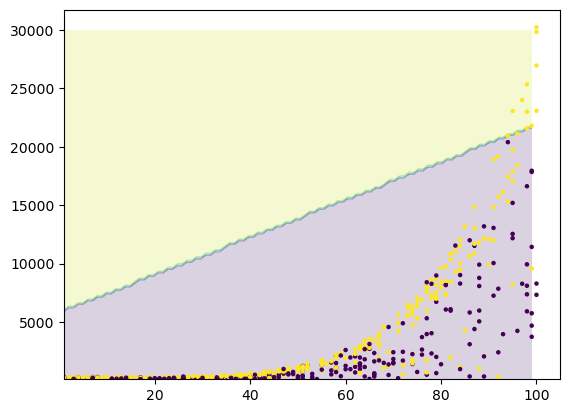

In [14]:
import matplotlib.pyplot as plt


plt.contourf(xx, yy, Z, alpha= 0.2)
plt.scatter(x_test.horas_esperadas, x_test.preco, c= y_test, s= 5)

# DECISION BOUNDARY

#
# SVC e StandardScaler
##### https://cursos.alura.com.br/course/machine-learning-introducao-a-classificacao-com-sklearn/task/46782

In [15]:
x= dados[['horas_esperadas', 'preco']]
y= dados['finalizado']

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED= 5
np.random.seed(SEED)
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, stratify= y)

model= SVC(gamma= 'auto')
model.fit(x_train, y_train)

previsoes= model.predict(x_test)
taxa_acerto= accuracy_score(y_test, previsoes)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(x_train), len(x_test)))
print("A acurácia foi de %.2f%%" % (taxa_acerto*100))

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi de 59.07%


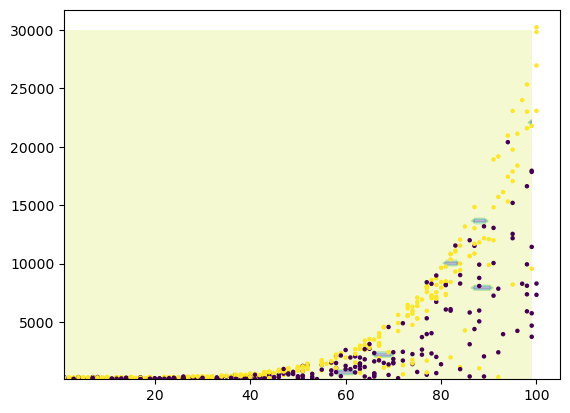

In [16]:
x_min = x_test.horas_esperadas.min()
x_max = x_test.horas_esperadas.max()
y_min = x_test.preco.min()
y_max = x_test.preco.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/ pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/ pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = model.predict(pontos)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha= 0.2)
plt.scatter(x_test.horas_esperadas, x_test.preco, c= y_test, s= 5)

# DECISION BOUNDARY

In [17]:
from sklearn.preprocessing import StandardScaler

x= dados[['horas_esperadas', 'preco']]
y= dados['finalizado']

SEED= 5
np.random.seed(SEED)
raw_x_train, raw_x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, stratify= y)


# coloca o escalador(scaler) para treinar com o treino x, entao baseado no teste x, criara uma escala nova e ai vai 
# transformar tanto o treino como o teste na nova reescala
scaler= StandardScaler()
scaler.fit(x_train)                    
x_train= scaler.transform(raw_x_train)
x_test= scaler.transform(raw_x_test)
# # #


model= SVC(gamma= 'auto')
model.fit(x_train, y_train)

previsoes= model.predict(x_test)
taxa_acerto= accuracy_score(y_test, previsoes)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(x_train), len(x_test)))
print("A acurácia foi de %.2f%%" % (taxa_acerto*100))

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi de 66.85%


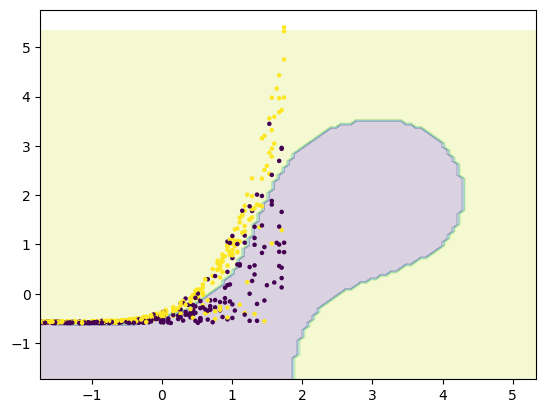

In [18]:
# Como apos o scaler ter transformado o test_x em duplas de arrays, o x_test.horas_esperas e o x_test.preco nao funcionam
# mais, justamente porque nao sao mais um dataframe do pandas e sim a dupla de arrays da qual mencionei. Portanto, vamos
# precisar criar duas novas variaveis para pode selecionar e separar as colunas dos arrays, que representam o 
# x_test.horas_esperas e o x_test.preco, para podermos substituir nos eixos do grafico com a nova escala
data_horasesperadas= x_test[:,0]
data_preco= x_test[:,1]
# # #

x_min = data_horasesperadas.min()
x_max = data_preco.max()
y_min = data_horasesperadas.min()
y_max = data_preco.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/ pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/ pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = model.predict(pontos)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha= 0.2)
plt.scatter(data_horasesperadas, data_preco, c= y_test, s= 5)

# DECISION BOUNDARY